# Comp 551-Assignment 1


## Aymen Rumi-260661663
   
### ***-Refer to report for further detailed exlanation/observation/answers to each inidivudal question and their subquestions: this file contains mainly code and viualizations with explanation for my work, this file is still very comprehensive of the assignment-***



In [284]:
#all modules needed for assignment
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
import math
import random
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)



# Question 1: Sampling


In [283]:
#Probabilities of multinormal distribution
Movies=0.2
COMP551=0.4
Playing=0.1
Studying=0.3


distribution= {"Playing": 0 , "Movies": 0, "Studying": 0, "COMP-551": 0}

#function given sample size, finds the distribution
def sampling(n):
    for x in range(n):
        randomNum= random.uniform(0, 1)

        if(0<randomNum and randomNum<= Playing):
            distribution["Playing"]+=1

        elif (Playing<randomNum and randomNum<= Playing+Movies):
            distribution["Movies"]+=1

        elif ((Playing+Movies)< randomNum and randomNum<= Playing+Movies+Studying):
            distribution["Studying"]+=1

        elif ((Playing+Movies+Studying)< randomNum and randomNum<=1):
            distribution["COMP-551"]+=1
    return distribution

#return samples for 100 and 1000
print("Samling Distribution for 100 samples: ")
print(sampling(100))
print("")
print("Samling Distribution for 1000 samples: ")
print(sampling(1000))

Samling Distribution for 100 samples: 
{'Playing': 11, 'Movies': 22, 'Studying': 29, 'COMP-551': 38}

Samling Distribution for 1000 samples: 
{'Playing': 126, 'Movies': 199, 'Studying': 340, 'COMP-551': 435}


# Question 2: Model Selection

## 2.1

Training Mean Square Error: 6.474844350103398


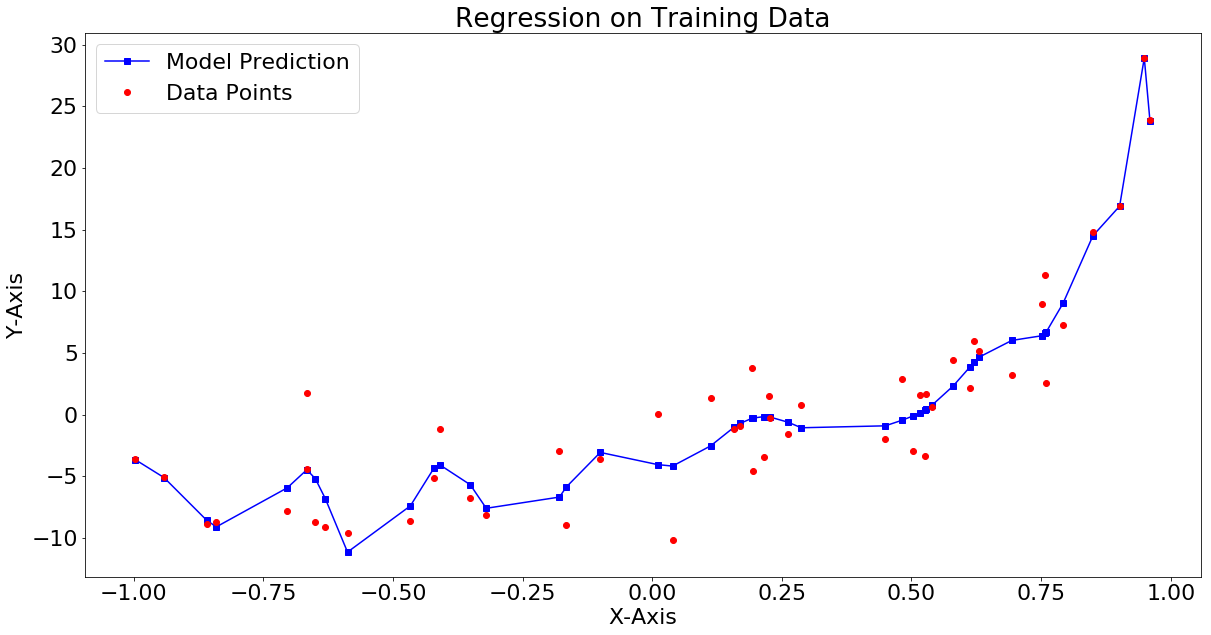

In [278]:
#function to import data given open file
def import_data(file):
    reader = csv.reader(file)
    data=[]
    #taking in input/output data
    for row in reader:
        # row = [x,y]
        input=float(row[0])
        output=float(row[1])
        data.append([input,output])
        ##sort datapoints for better plotting
        data.sort(key=lambda x: x[0])
    return data

#importing training data
data=import_data(open("Dataset_1_train.csv", newline=''))

#function to seperate x and y from dataset
def input_output(data):
    x=[]
    y=[]
    #taking in x data and y data seperately
    for i in data:
        x.append(i[0])
        y.append(i[1])
    return [x,y]

#initializing x and y
x=input_output(data)[0]
y=input_output(data)[1]

# function to make x matrix given x data and polynomial size
def polynomialMatrix(degree, x):
    matrix = []
    for j in range (len(x)):
        list = []
        for i in range(degree+1):
            list.append(math.pow(x[j],i))
        matrix.append(list)
    return np.matrix(matrix)


# function to make identity matrix given degree
def identityMatrix(degree):
    return (np.identity(degree+1))


#function finding weights for regression model given, y data matrix, x data matrix, lambda, and identity matrix
def weightMatrix(lmb, xMatrix, yMatrix, iMatrix):
    #formula: W=((X^T*X+λI)^-1)*(X^T*Y)
    return (np.linalg.inv((np.matrix.transpose(xMatrix)*xMatrix)+lmb*iMatrix)*(np.matrix.transpose(xMatrix)*yMatrix))




#initializing matrices to find weight for 20 degree polynomial model
xMatrix=polynomialMatrix(20,x)

yMatrix=np.transpose(np.matrix(y))

iMatrix=identityMatrix(20)

#lmb represents hyperparameter for regularization
lmb=0

#getting matrix of weights
wMatrix=weightMatrix(lmb,xMatrix,yMatrix,iMatrix)


# function that outputs values for regression prediction y given x and weights
def modelPrediction(x,wMatrix):
    yHat = []
    for j in range(len(x)):
        ybar = 0
        for i in range(len(wMatrix)):
            ybar = ybar + (wMatrix[i] * pow(x[j], i))
        yHat.append(ybar)
    return yHat


#getting yHat and fixing dimensions
yHat=np.squeeze(modelPrediction(x,wMatrix))


#function for mean squared error value given y and predicted y value
def MSE(y, yHat):
    return ((y - yHat) ** 2).mean()

# printing mean squared error
print("Training Mean Square Error:",MSE(y,yHat))


# Better visualization
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams.update({'font.size': 22})

# function for plotting true function as red and model prediction function as blue
def plot(x,y,yHat):
    plt.ylabel('Y-Axis')
    plt.xlabel('X-Axis')
    plt.plot(x,yHat,"bs-",x,y,"ro")
    plt.legend(['Model Prediction', 'Data Points'])
    plt.show()

#plot data
plt.title("Regression on Training Data")
plot(x,y,yHat)

## We now run the same regression on the validation dataset

Validation Mean Square Error: 362.8865314049727


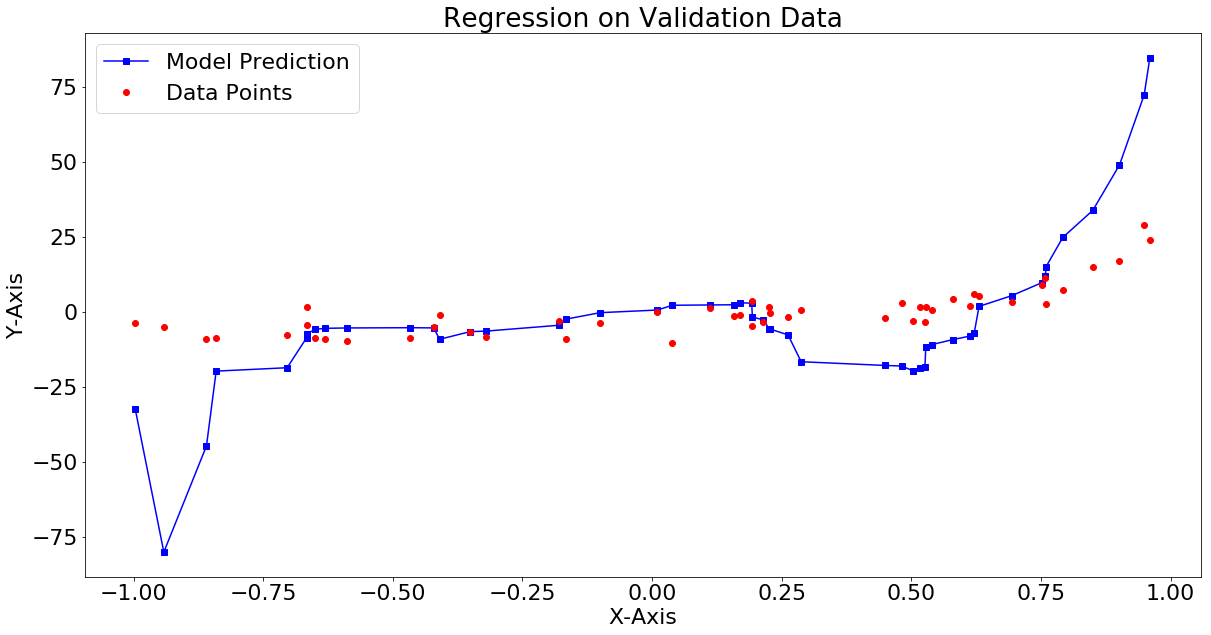

In [280]:
##using functions defined earlier to run regression on a different data set(validation data set)

#import validation data
data=import_data(open("Dataset_1_valid.csv", newline=''))

#finding yHat and fixing dimensions
yHat=np.squeeze(modelPrediction((input_output(data)[0]),weightMatrix(lmb,polynomialMatrix(20,(input_output(data)[0])),np.transpose(np.matrix((input_output(data)[1]))),identityMatrix(20))))

# printing mean squared error
print("Validation Mean Square Error:",MSE((input_output(data)[1]),yHat))

#plotting true function as red and modle prediction function as blue
plt.title("Regression on Validation Data")
plot(x,y,yHat)

## 2.2


## -Trying different λ values on training & validation data, to pick right hyperparameter for dataset, and using on test data

Hyperparameter λ: 0.0
Training Mean Square Error: 6.474844350103398


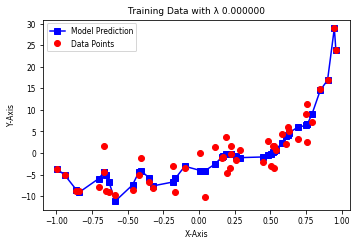

Hyperparameter λ: 0.1
Training Mean Square Error: 8.997212750117926


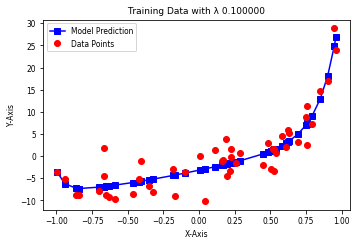

Hyperparameter λ: 0.2
Training Mean Square Error: 9.045931550202345


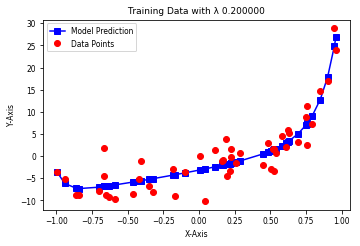

Hyperparameter λ: 0.30000000000000004
Training Mean Square Error: 9.070987861162882


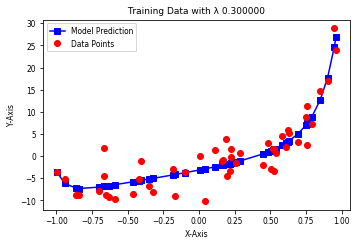

Hyperparameter λ: 0.4
Training Mean Square Error: 9.089891028647225


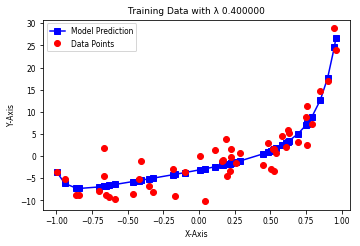

Hyperparameter λ: 0.5
Training Mean Square Error: 9.10718913857163


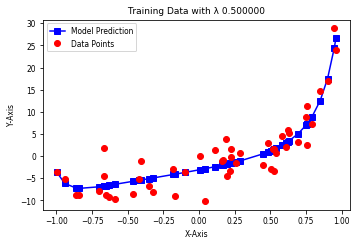

Hyperparameter λ: 0.6000000000000001
Training Mean Square Error: 9.124562365560266


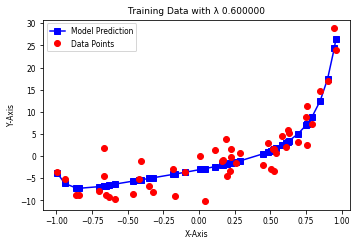

Hyperparameter λ: 0.7000000000000001
Training Mean Square Error: 9.142753444166514


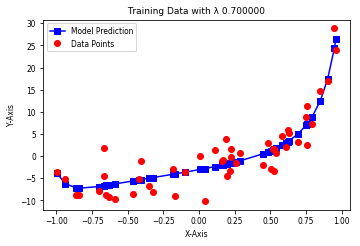

Hyperparameter λ: 0.8
Training Mean Square Error: 9.16212374696725


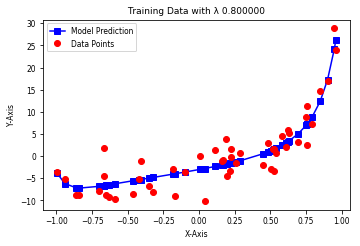

Hyperparameter λ: 0.9
Training Mean Square Error: 9.182855917155573


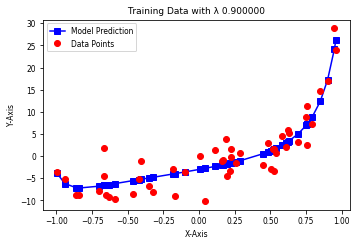

Hyperparameter λ: 1.0
Training Mean Square Error: 9.205040170904356


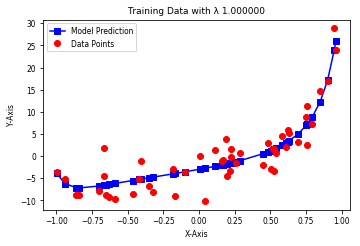

In [6]:
# adding L2 regularization to the model, trying different values for hyperparameter lmb from 0 to 1
plt.rcParams['figure.figsize'] = (5.5, 3.5)
plt.rcParams.update({'font.size': 7.5})

## import training data
data=import_data(open("Dataset_1_train.csv", newline=''))

## creating for loop to try values from 0 to 10 and setting lambda= i/10, thus tryin values for lambda 0 to 1 for every 0.1
for i in range(11):
    lmb=i*0.1
    print("Hyperparameter λ:",lmb)
    yHat=np.squeeze(modelPrediction((input_output(data)[0]),weightMatrix(lmb,polynomialMatrix(20,(input_output(data)[0])),np.transpose(np.matrix((input_output(data)[1]))),identityMatrix(20))))
    print("Training Mean Square Error:",MSE((input_output(data)[1]),yHat))
    plt.title("Training Data with λ %f" %lmb)
    plot(x,y,yHat)

Hyperparameter λ: 0.0
Training Mean Square Error: 362.8865314049727


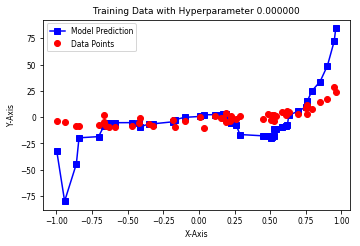

Hyperparameter λ: 0.1
Training Mean Square Error: 7.865625837380228


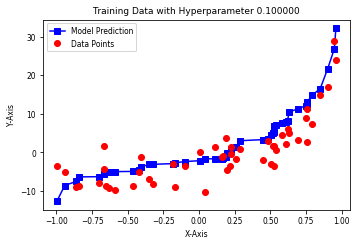

Hyperparameter λ: 0.2
Training Mean Square Error: 7.913559164785389


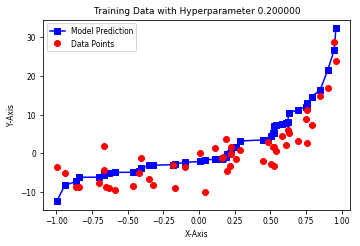

Hyperparameter λ: 0.30000000000000004
Training Mean Square Error: 7.952023239784991


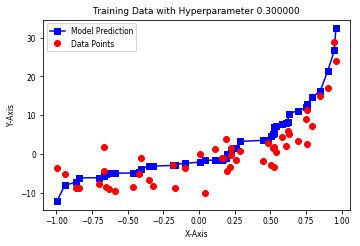

Hyperparameter λ: 0.4
Training Mean Square Error: 7.987019530500939


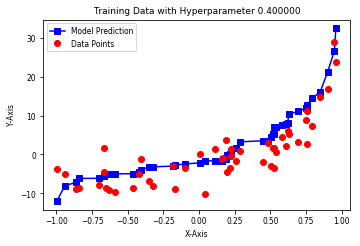

Hyperparameter λ: 0.5
Training Mean Square Error: 8.020452166923915


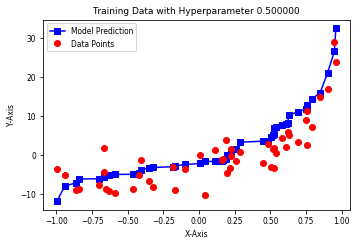

Hyperparameter λ: 0.6000000000000001
Training Mean Square Error: 8.053216764145931


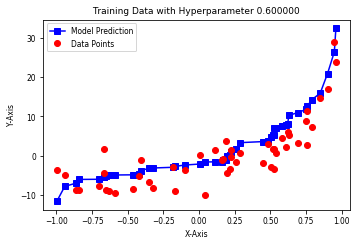

Hyperparameter λ: 0.7000000000000001
Training Mean Square Error: 8.085827432297673


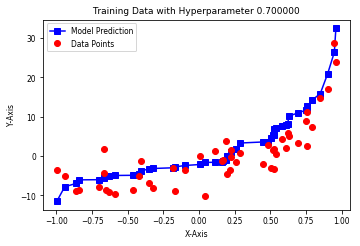

Hyperparameter λ: 0.8
Training Mean Square Error: 8.118614328418127


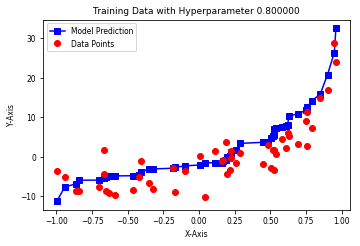

Hyperparameter λ: 0.9
Training Mean Square Error: 8.151803200805853


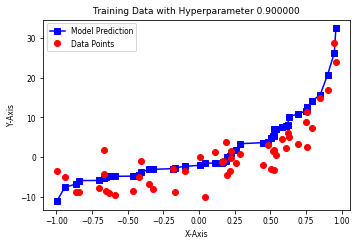

Hyperparameter λ: 1.0
Training Mean Square Error: 8.185553613224007


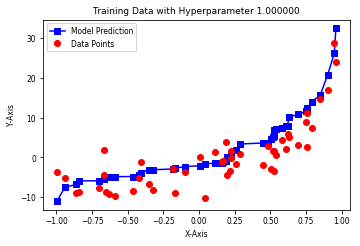

In [7]:
## import data
data=import_data(open("Dataset_1_valid.csv", newline=''))

## creating for loop to try values from 0 to 10 and setting lambda= i/10, thus tryin values for lambda 0 to 1 for every 0.1
for i in range(11):
    lmb=i*0.1
    print("Hyperparameter λ:",lmb)
    yHat=np.squeeze(modelPrediction((input_output(data)[0]),weightMatrix(lmb,polynomialMatrix(20,(input_output(data)[0])),np.transpose(np.matrix((input_output(data)[1]))),identityMatrix(20))))
    print("Training Mean Square Error:",MSE((input_output(data)[1]),yHat))
    plt.title("Training Data with Hyperparameter %f" %lmb)
    plot(x,y,yHat)

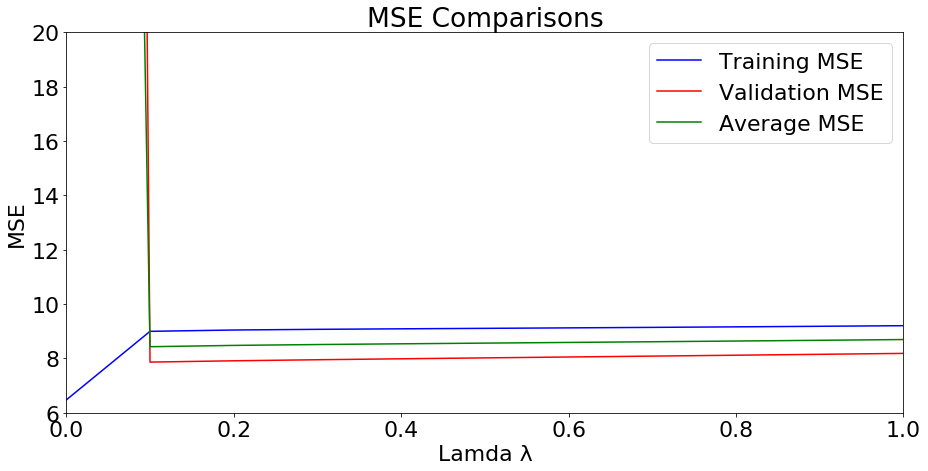

In [12]:
#we will plot the mean squared error with respect to lamda for each training,validation,
#and test set and pick the best one

# make list of lamda values to try from 0 to 1 with step size 0.1
lmb=0
lamdas=[]
for i in range(11):
    lmb=i*0.1
    lamdas.append(lmb)

# initialize training and validation mses
mse_train=[]
mse_valid=[]
mse_average=[]


# function that gives a list of all mse for each lamda, with input dataset
def mse_for_lamdas(lamdas,mse_list, data):
    for i in lamdas:
        yHat=np.squeeze(modelPrediction((input_output(data)[0]),weightMatrix(i,polynomialMatrix(20,(input_output(data)[0])),np.transpose(np.matrix((input_output(data)[1]))),identityMatrix(20))))
        mse_list.append(MSE((input_output(data)[1]),yHat))
    return mse_list
        
mse_for_lamdas(lamdas,mse_train,import_data(open("Dataset_1_train.csv", newline='')))
mse_for_lamdas(lamdas,mse_valid,import_data(open("Dataset_1_valid.csv", newline='')))

for i in range(len(mse_train)):
    mse_average.append((mse_train[i]+mse_valid[i])/2)
  

# Better visualization
plt.rcParams['figure.figsize'] = (15.0, 7.0)
plt.rcParams.update({'font.size': 22})

plt.ylabel('MSE')
plt.xlabel('Lamda λ')
plt.plot(lamdas,mse_train,"-b",lamdas,mse_valid,"-r",lamdas, mse_average,"g")
plt.legend(['Training MSE', 'Validation MSE', 'Average MSE'])
plt.axis([0,1,6,20])
plt.title("MSE Comparisons")
plt.show() 


## -Lambda value λ=0.1 seems to do the job

Testing Mean Square Error: 9.266653595304659


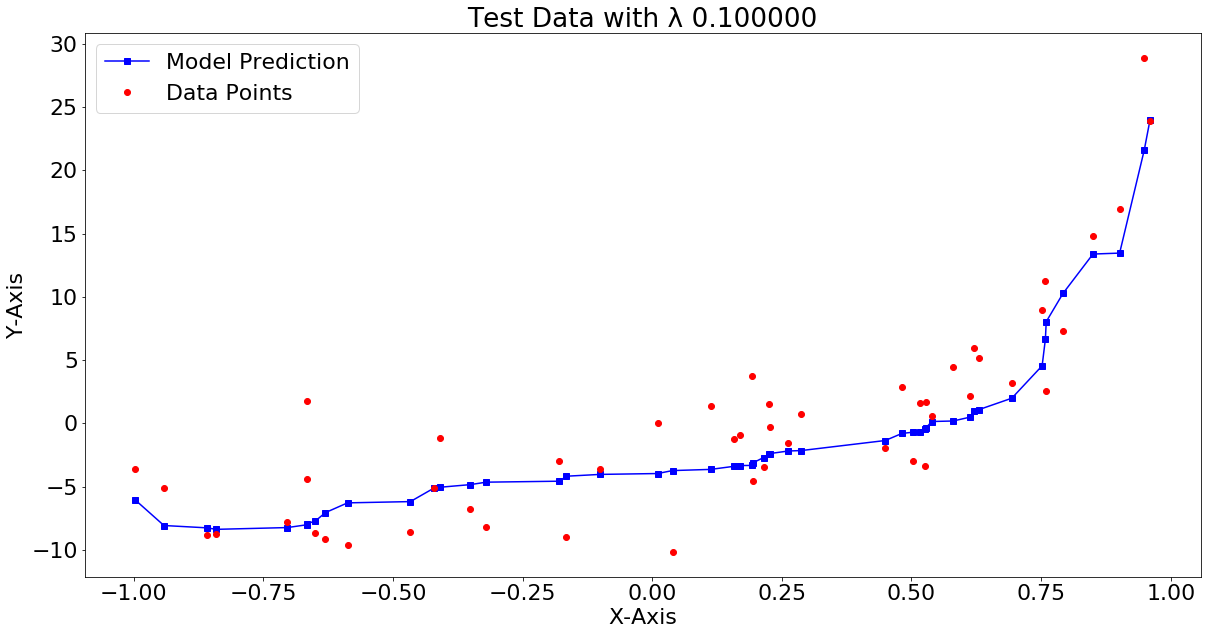

In [9]:
##using hyperparameter 0.1 to use on test set
lmb=0.1
data=import_data(open("Dataset_1_test.csv", newline=''))
yHat=np.squeeze(modelPrediction((input_output(data)[0]),weightMatrix(lmb,polynomialMatrix(20,(input_output(data)[0])),np.transpose(np.matrix((input_output(data)[1]))),identityMatrix(20))))

print("Testing Mean Square Error:",MSE((input_output(data)[1]),yHat))


# Better visualization
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams.update({'font.size': 22})

#plotting true function as red and modle prediction function as blue
plt.title("Test Data with λ %f"%lmb)
plot(x,y,yHat)

## 2.3- *Refer to Report*

# Question 3: Gradient Descent for Regression

## 3.1

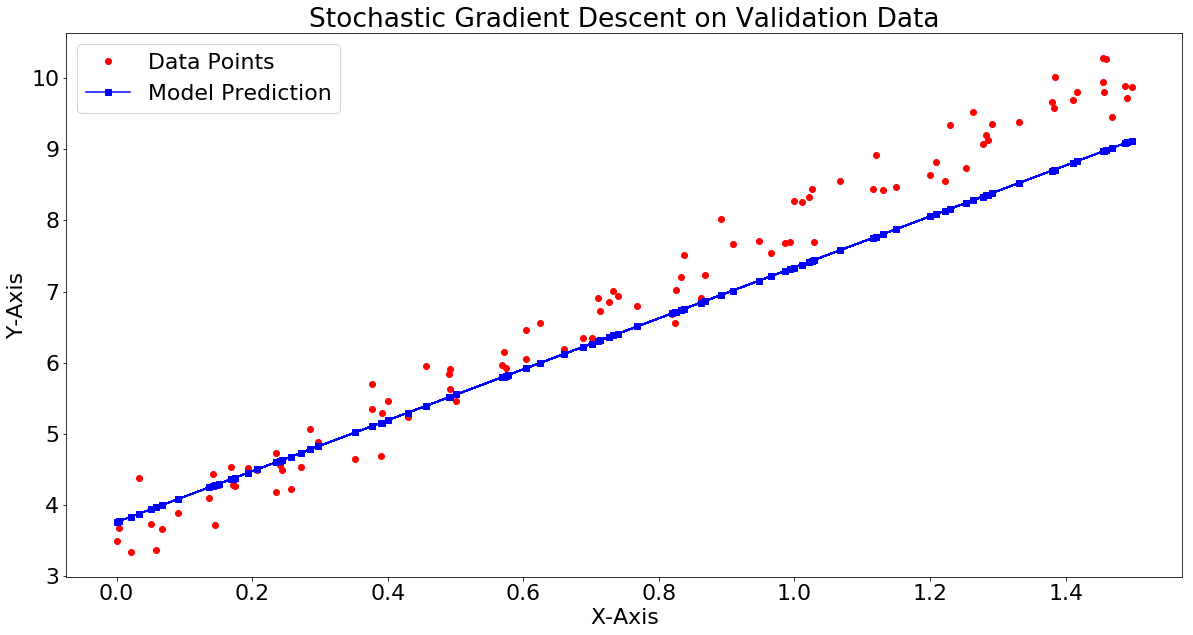

Mean Squared Error:  0.35805674813271227


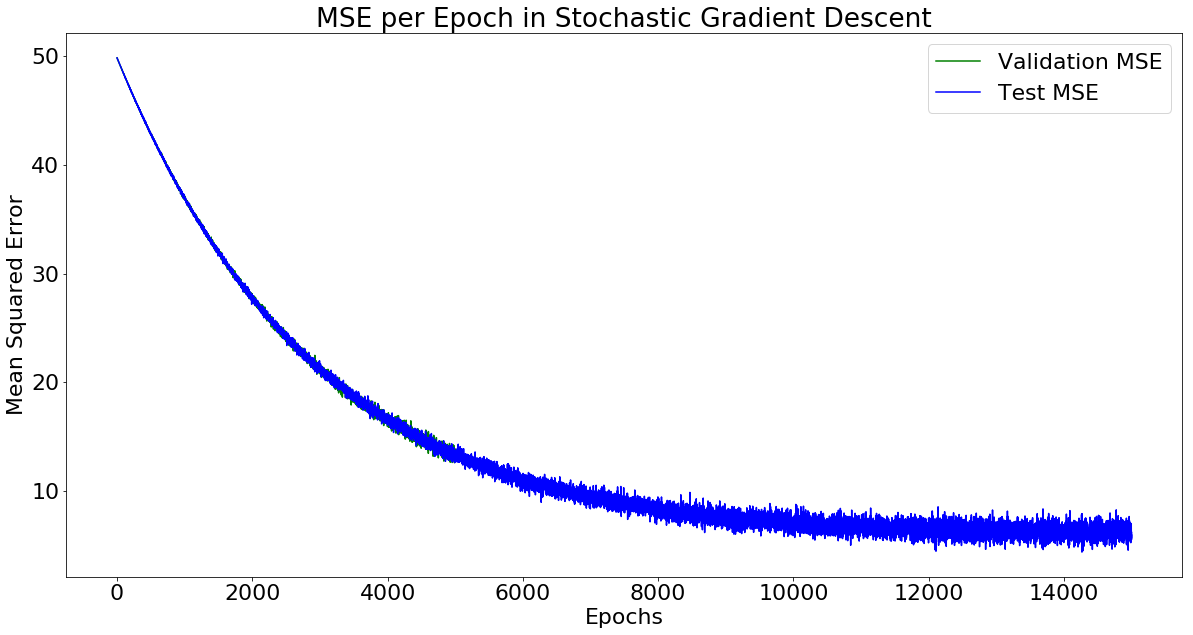

In [244]:
#importing data for validation set using previous functions
data=import_data(open("Dataset_2_valid.csv", newline=''))
x=input_output(data)[0]
y=input_output(data)[1]

#function for shuffling dataset, given x and y will shuffles [x1,y1],[x2,x2]....[xN,xN]
def shuffle_in_unison(x, y):
    rng_state = np.random.get_state()
    np.random.shuffle(x)
    np.random.set_state(rng_state)
    np.random.shuffle(y)      

#step size alpha
alpha=int()
    
# function for basic linear model
def linearModel(w0,w1,x):
    return (w0+(w1*x))

#Stochastic Gradient Descent Function, outputs weights given starting weight points, epochs, and step size alpha
def stochastic_gradientDescent(w0,w1,alpha, epochs):
    new_w0=w0
    new_w1=w1
    #j range is an epoch
    for j in range (0,epochs):
        shuffle_in_unison(x, y)
        for i in range (len(x)):
            new_w0=new_w0-alpha*(linearModel(new_w0,new_w1,x[i])-y[i])
            new_w1=new_w1-alpha*(linearModel(new_w0,new_w1,x[i])-y[i])*x[i]
    return[new_w0,new_w1]


# function that outputs values for regression model
def modelPrediction(weights):
    yHat = []
    for i in x:
        yHat.append(linearModel(weights[0], weights[1], i))
    return yHat

#function that, given empty 2 lists, runs SGC while saving mse for every epoch
def mse_per_epoch(epochs,alpha,w0,w1,epoch_list,mse_list,data):
    x=input_output(data)[0]
    y=input_output(data)[1]
    predicted_w0=w0
    predicted_w1=w1
    #j range is an epoch
    for j in range (0,epochs):
        epoch_list.append(j)
        shuffle_in_unison(x, y)
        for i in range (len(x)):
            predicted_w0=predicted_w0-alpha*(linearModel(predicted_w0,predicted_w1,x[i])-y[i])
            predicted_w1=predicted_w1-alpha*(linearModel(predicted_w0,predicted_w1,x[i])-y[i])*x[i]
        ypredict=np.squeeze(modelPrediction([predicted_w0,predicted_w1]))
        mse_list.append(MSE(y,ypredict))
        
#function to plot given x,y,yhat        
def plot(x,y,yHat):   
    #plotting true function as red and modle prediction function as blue
    plt.ylabel('Y-Axis')
    plt.xlabel('X-Axis')
    plt.plot(x,y,"ro",x,yHat,"-bs")
    plt.legend(['Data Points', 'Model Prediction'])
    plt.show()

    
#saving weights and prediction value for SGC with step size 1e-6, and epoch 1500
weights=stochastic_gradientDescent(1,1,1e-6,15000)
yHat=np.squeeze(modelPrediction(weights))

# Better visualization
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams.update({'font.size': 22})


plt.title("Stochastic Gradient Descent on Validation Data")
plot(x,y,yHat)
# printing mean squared error
print("Mean Squared Error: ",MSE(y,yHat))


#initializing list of epochs and MSEs
epoch_list_validation=[]
mse_list_validation=[]
mse_per_epoch(5000,1e-6,0,0,epoch_list_validation,mse_list_validation,import_data(open("Dataset_2_test.csv", newline='')))


epoch_list_test=[]
mse_list_test=[]
mse_per_epoch(15000,1e-6,0,0,epoch_list_test,mse_list_test,import_data(open("Dataset_2_test.csv", newline='')))

##plotting mse for every epoch, for 15000 epochs for both test and validation
plt.ylabel('Mean Squared Error')
plt.xlabel('Epochs')
plt.title("MSE per Epoch in Stochastic Gradient Descent")
plt.plot(epoch_list_validation,mse_list_validation,"-g",epoch_list_test,mse_list_test,"-b")
plt.legend(['Validation MSE','Test MSE'])
plt.show()


## 3.2

In [122]:
##we will try different step sizes for alpha, from 1e-6,1e-5,1e-4......to 1, let's use 100 epochs for easier computation

alpha_values=[]
for i in range(0,8):
    alpha=((1e-6)*math.pow(10,i))
    alpha_values.append(alpha)

#importing validation data
data=import_data(open("Dataset_2_valid.csv", newline=''))
x=input_output(data)[0]
y=input_output(data)[1]

mse_values=[]

for i in alpha_values:
    weights=stochastic_gradientDescent(1,1,i,100)
    yHat=np.squeeze(modelPrediction(weights))
    mse_values.append(MSE(y,yHat))

#function to truncate floating point number
def truncate(f, n):
    '''Truncates/pads a float f to n decimal places without rounding'''
    s = '%.12f' % f
    i, p, d = s.partition('.')
    return '.'.join([i, (d+'0'*n)[:n]])  

print("Step Sizes α           Validation MSE")
print("----------             --------------")
for i in range (len(alpha_values)):
    print(truncate(alpha_values[i],10),"         ",truncate(mse_values[i],10))

# as you can see 1e-2 corresponds to the best step size

Step Sizes α           Validation MSE
----------             --------------
0.0000010000           27.1819665302
0.0000100000           20.2963247776
0.0001000000           1.2216319105
0.0010000000           0.0814134566
0.0100000000           0.0727487445
0.1000000000           0.0815639953
1.0000000000           3.0386834831
10.0000000000           nan.0000000000


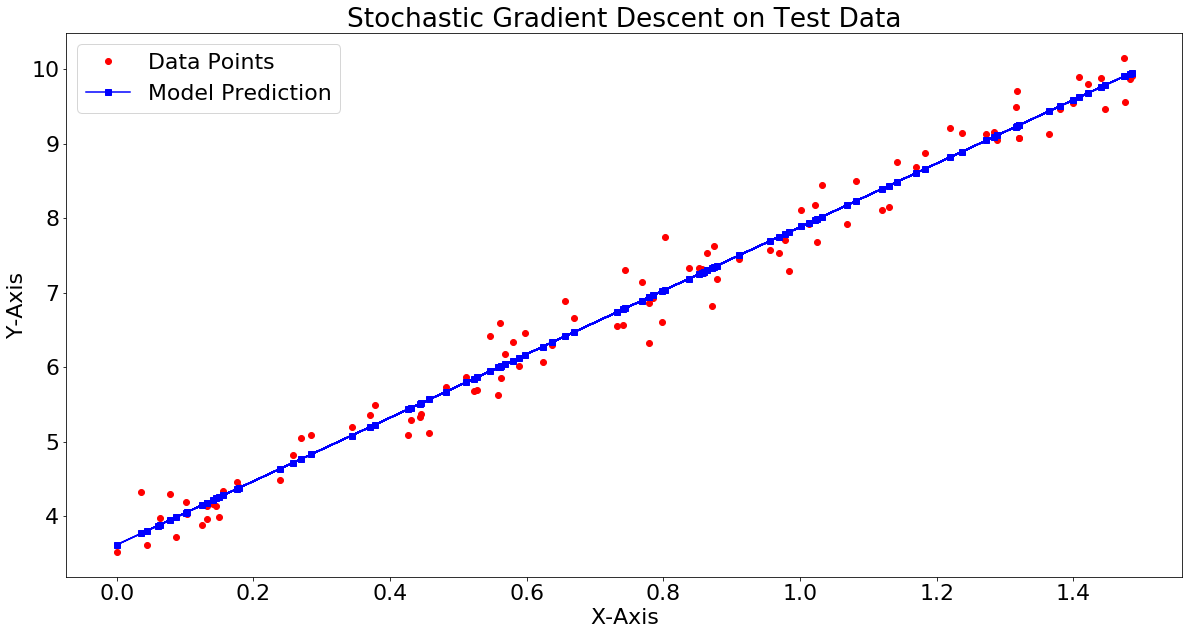

Mean Squared Error:  0.06885148334858805


In [173]:
# showing test mse model with step size 1e-2
data=import_data(open("Dataset_2_test.csv", newline=''))
x=input_output(data)[0]
y=input_output(data)[1]

weights=stochastic_gradientDescent(1,1,1e-2,1000)
yHat=np.squeeze(modelPrediction(weights))

plt.title("Stochastic Gradient Descent on Test Data")
plot(x,y,yHat)


print("Mean Squared Error: ",MSE(y,yHat))

## 3.3

Mean Squared Error  28.21544698600804


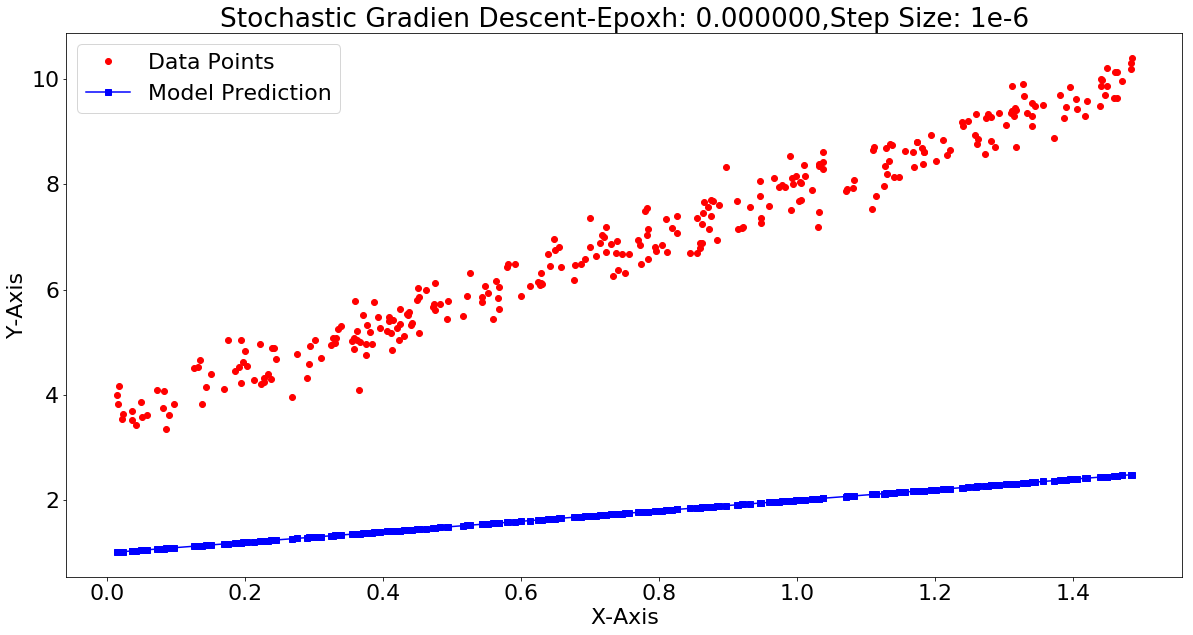

Mean Squared Error  4.010250045728637


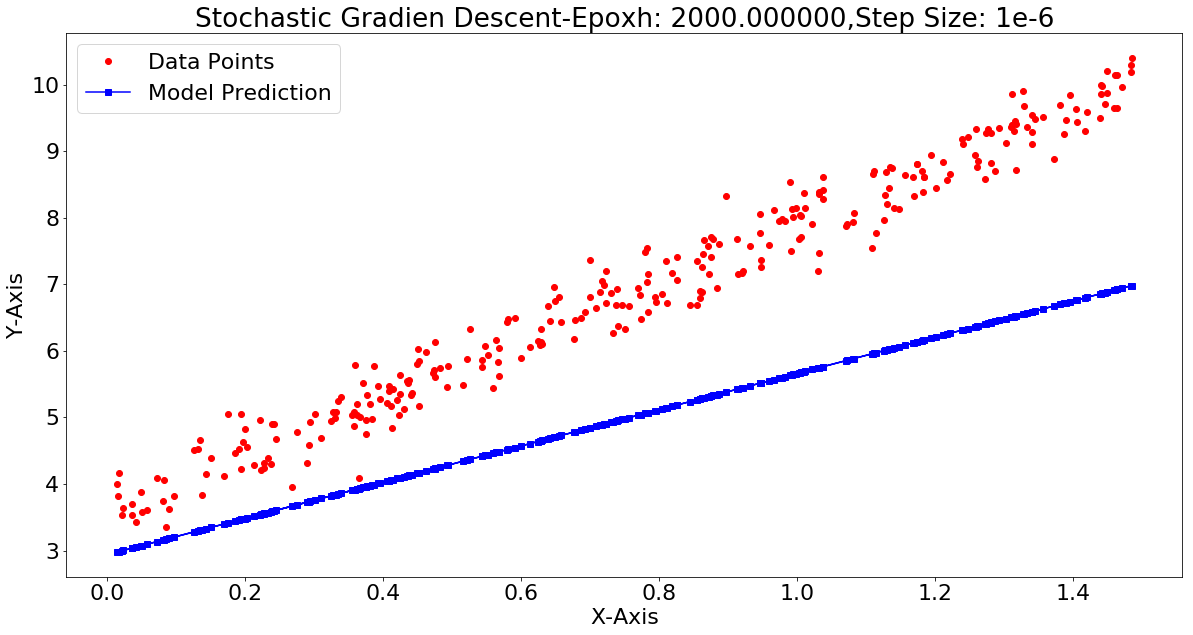

Mean Squared Error  0.6822130970580497


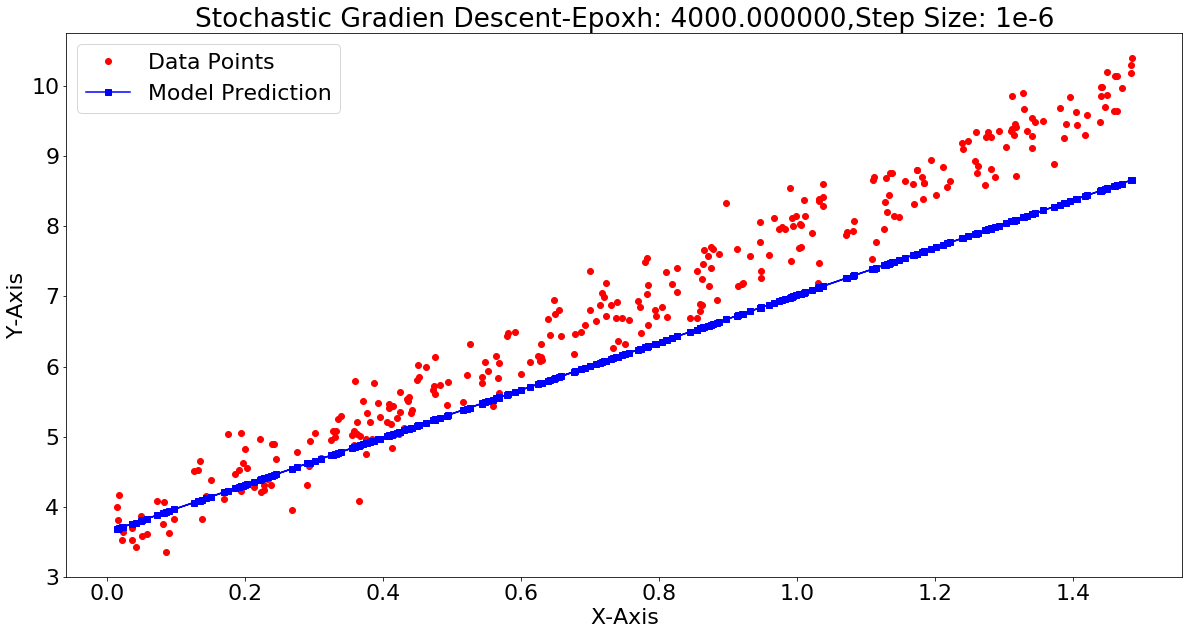

Mean Squared Error  0.21968412833193032


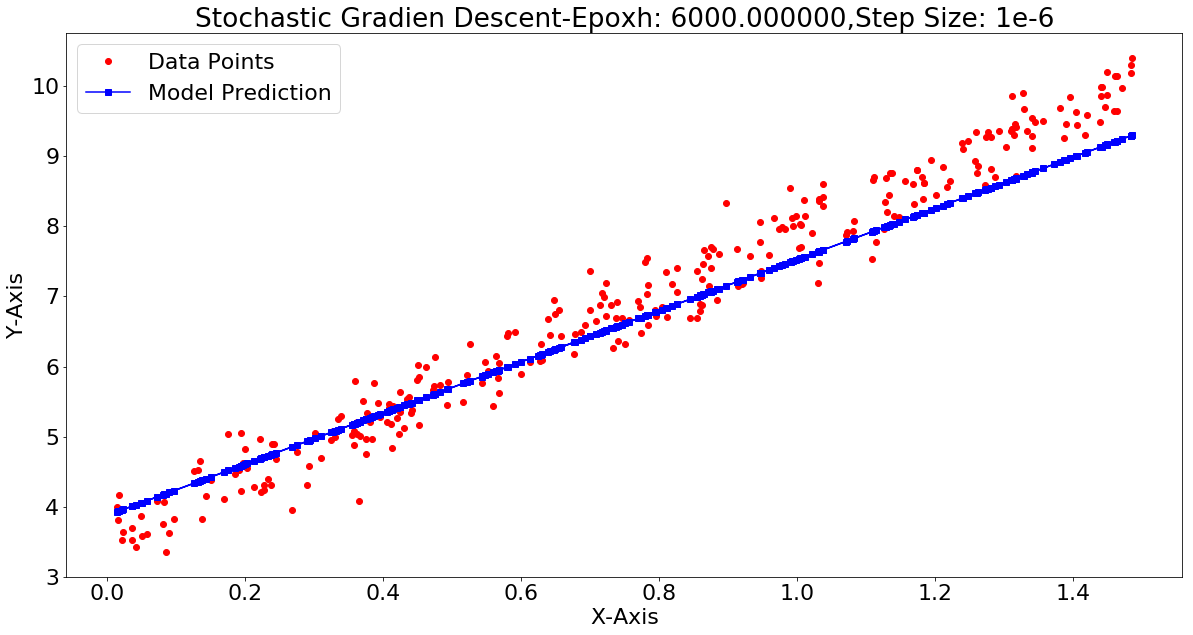

Mean Squared Error  0.1510484481446133


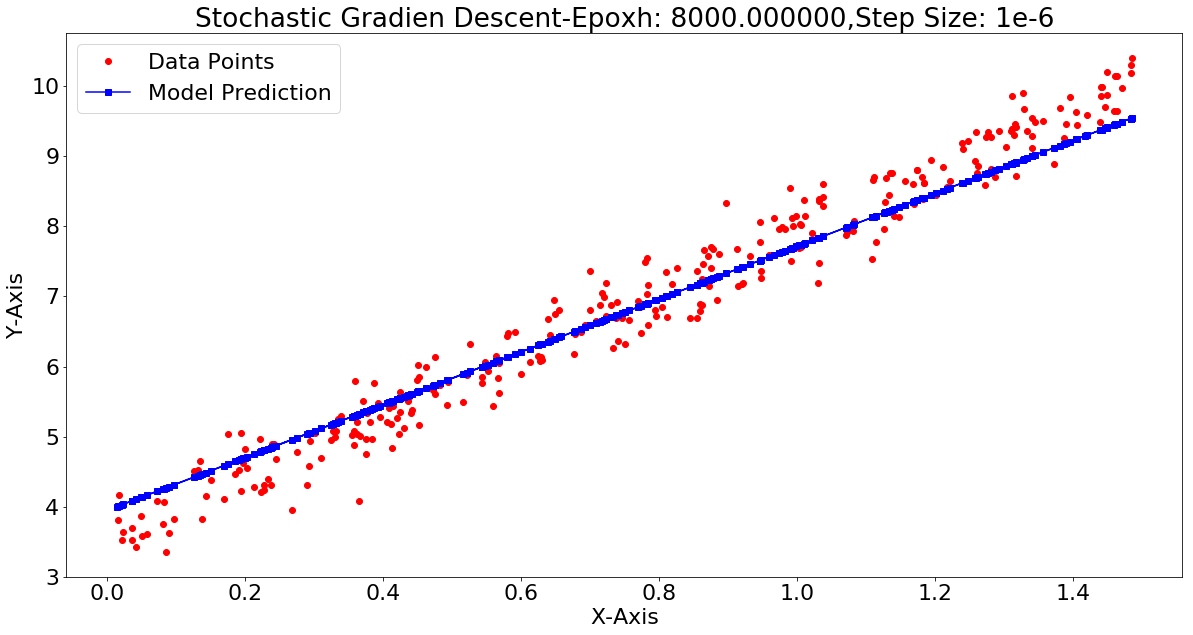

Mean Squared Error  0.13707360892567869


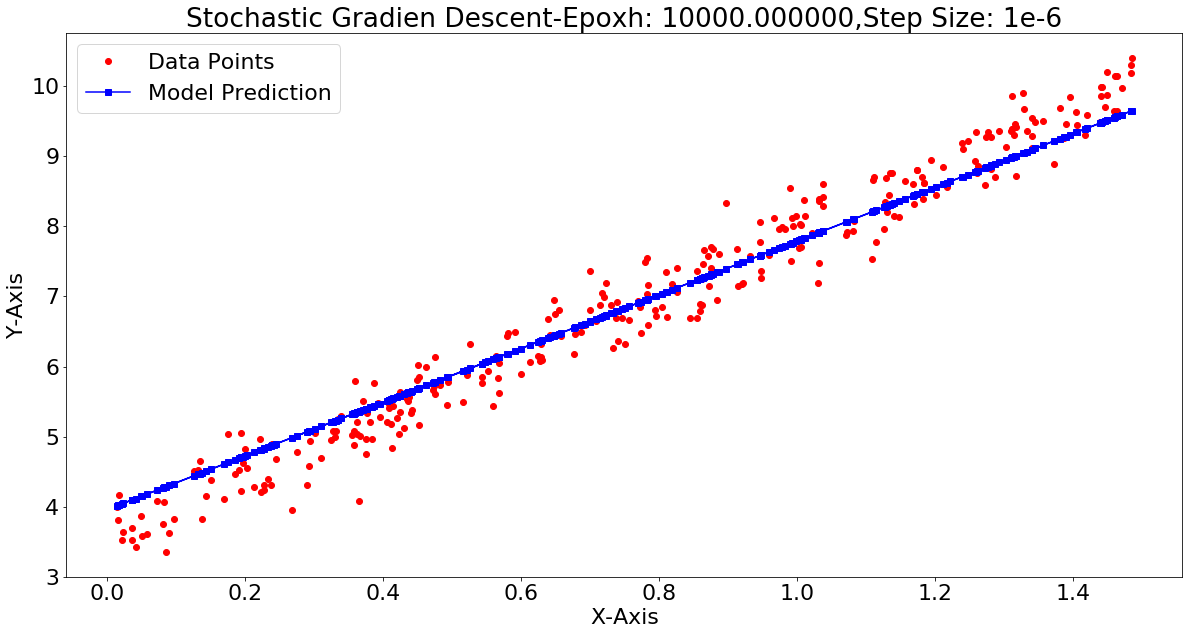

In [195]:
#showing epoch evolution 
data=import_data(open("Dataset_2_train.csv", newline=''))
x=input_output(data)[0]
y=input_output(data)[1]

for i in range(0,10001,2000):
    weights=stochastic_gradientDescent(1,1,1e-6,i)
    yHat=modelPrediction(weights)
    print("Mean Squared Error ",MSE(y,np.squeeze(yHat)))
    plt.title("Stochastic Gradien Descent-Epoch: %f,Step Size: 1e-6"%i)
    plot(x,y,yHat)


# Question 4: Real Life Dataset


## 4.1

In [333]:
#import crime data into pandas dataframe 
data = pd.read_csv('communities.data.txt', header=None, sep=',', na_values=['?'])
#print data
data.head()


,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


In [334]:
# fill each ? with the mean of the column
for i in data:
    try :
        m = data[i].mean()
        data[i].fillna(m, inplace=True)
    except :
        continue

# add titles to to colums from the .names file
with open("communities.names.txt", 'r') as names:
    communityNames = names.read().splitlines(True)

title = []
for line in communityNames:
    if ('@data' in line):
        break
    else:
        if (line.startswith('@attribute')):
            if 'numeric' in line:
                title.append((line.split('@attribute '))[1].split(' numeric')[0])
            else:
                title.append((line.split('@attribute '))[1].split(' string')[0])

data.columns= title

#output files out
data.to_csv('cleaned_communities.data')

#drop first 5 colums because not part of our input values
data.drop(['state', 'county', 'community', 'communityname', 'fold'], axis=1, inplace=True)

#print data
data.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.03


## 4.2

In [335]:
#make 5 train datasets and 5 test datasets
iteration=1
CandC_train1 = pd.DataFrame()
CandC_train2 = pd.DataFrame()
CandC_train3 = pd.DataFrame()
CandC_train4 = pd.DataFrame()
CandC_train5 = pd.DataFrame()
CandC_test1 = pd.DataFrame()
CandC_test2 = pd.DataFrame()
CandC_test3 = pd.DataFrame()
CandC_test4 = pd.DataFrame()
CandC_test5 = pd.DataFrame()


# Partition into 5 equal sets
for subset in np.array_split(data, 5):
    foo = "CandC_train" + str(iteration)
    foo2 = "CandC_test" + str(iteration)

    # Further partition into 80 - 20 split sets
    exec(foo + " = subset.sample(frac=0.8, random_state=200)")
    exec(foo2 + " = subset.drop(" + foo + ".index)")

    # Drop the index column generated
    exec(foo + ".reset_index(drop = True, inplace=True)")
    exec(foo2 + ".reset_index(drop = True, inplace=True)")

    # Export the csvs
    exec(foo + ".to_csv('" + foo + ".csv', index=False)")
    exec(foo2 + ".to_csv('" + foo2 + ".csv', index=False)")
    iteration += 1


#adding into list to access one by one, also converting from pandas datafram to matrix array
trainingSet=[]
trainingSet.append(CandC_train1.as_matrix())
trainingSet.append(CandC_train2.as_matrix())
trainingSet.append(CandC_train3.as_matrix())
trainingSet.append(CandC_train4.as_matrix())
trainingSet.append(CandC_train5.as_matrix())

#adding to list
testingSet=[]
testingSet.append(CandC_test1.as_matrix())
testingSet.append(CandC_test2.as_matrix())
testingSet.append(CandC_test3.as_matrix())
testingSet.append(CandC_test4.as_matrix())
testingSet.append(CandC_test5.as_matrix())


CandC_train1

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.03,0.68,0.01,0.98,0.06,0.01,0.49,0.46,0.32,0.35,...,0.03,0.25,0.18,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.03
1,0.02,0.50,0.06,0.93,0.09,0.04,0.28,0.36,0.21,0.51,...,0.01,0.39,0.47,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.04
2,0.02,0.35,0.08,0.92,0.06,0.02,0.33,0.37,0.24,0.60,...,0.06,0.09,0.05,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.10
3,0.03,0.35,0.21,0.83,0.01,0.01,0.39,0.45,0.30,0.54,...,0.03,0.21,0.07,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.32
4,0.04,0.31,1.00,0.01,0.24,0.28,0.34,0.47,0.31,0.62,...,0.03,0.28,1.00,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,1.00
5,0.01,0.61,0.05,0.73,0.91,0.05,0.41,0.39,0.22,0.15,...,0.07,0.05,1.00,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.04
6,0.01,0.41,1.00,0.18,0.01,0.01,0.43,0.46,0.31,0.55,...,0.02,0.18,0.01,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.73
7,0.00,0.48,0.18,0.85,0.04,0.00,0.66,0.65,0.54,0.40,...,0.01,0.21,0.01,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.48
8,0.12,0.49,0.09,0.68,0.07,0.52,0.52,0.56,0.43,0.41,...,0.14,0.15,0.04,0.100000,0.020000,0.620000,0.000000,1.00,0.110000,0.21
9,0.06,0.26,0.04,0.89,0.19,0.05,0.34,0.49,0.33,0.52,...,0.04,0.27,0.24,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.36


In [336]:

#function to get all the input data values
def xValues(data_matrix):
    x=[]
    for i in range (len(data_matrix)):
        list=[]
        list.append(1)
        for j in range (len(data_matrix[0])-1):
            list.append(data_matrix[i][j])
        x.append(list)
    return x


# function to get output value y which corresponds to violent crimes per pop
def yValues(data_matrix,column ):
    y = []
    for i in range(len(data_matrix)):
        value = data_matrix[i][column]
        y.append(data_matrix[i][column])
    return y


#function to get identity matrix
def identityMatrix(size):
    return (np.identity(size))


def weightMatrix(lmb, xMatrix, yMatrix, iMatrix ):
    #formula: W=((X^T*X)^-1)*(X^T*Y)
    return (np.linalg.inv((np.matrix.transpose(xMatrix) * xMatrix) + lmb * iMatrix) * (np.matrix.transpose(xMatrix) * yMatrix))


xmatrix=np.matrix(xValues(trainingSet[0]))
ymatrix=np.transpose(np.matrix(yValues(trainingSet[0],len(xValues(trainingSet[0])[0])-1)))
imatrix=identityMatrix(len(xValues(trainingSet[0])[0]))

# speacial function, given different data sets from dataset list and lambda, output weights
def dataWeights(i,lmb):
    xmatrix = np.matrix(xValues(trainingSet[i]))
    ymatrix = np.transpose(np.matrix(yValues(trainingSet[i], len(xValues(trainingSet[i])[i]) - 1)))
    imatrix = identityMatrix(len(xValues(trainingSet[i])[i]))
    w=weightMatrix(lmb, xmatrix, ymatrix, imatrix )
    return w


# function that outputs values for regression model given x and weights
def predictionValue(w,x):
    yHat = []
    for j in range (len(x)):
        ybar=0;
        for i in range (len(w)):
            ybar=ybar+(w[i]*x[j][i])
        yHat.append(ybar)
    return np.squeeze(yHat)


#function for mean squared error value given y and predicted y value
def MSE(y, yHat):
    return ((y - yHat) ** 2).mean()


MSEs_train=[]
MSEs_test=[]
for i in range(5):
    print("Data Weights for Training Set",i+1,": ",dataWeights(i,0))
    print("Mean Squared Error for Training Set",i+1,": ",MSE(yValues(trainingSet[i],len(xValues(trainingSet[i])[0])-1),predictionValue(dataWeights(i,0),xValues(trainingSet[i]))))
    print("Mean Squared Error for Test Set",i+1,": ",MSE(yValues(testingSet[i],len(xValues(testingSet[i])[0])-1),predictionValue(dataWeights(i,0),xValues(testingSet[i]))))
    MSEs_train.append(MSE(yValues(trainingSet[i],len(xValues(trainingSet[i])[0])-1),predictionValue(dataWeights(i,0),xValues(trainingSet[i]))))
    MSEs_test.append(MSE(yValues(testingSet[i],len(xValues(testingSet[i])[0])-1),predictionValue(dataWeights(i,0),xValues(testingSet[i]))))
    print("")
    
#print average of all mse for 5 training set
print("Average Means Squared Error(Training): ",np.mean(MSEs_train))
print("Average Means Squared Error(Testing): ",np.mean(MSEs_test))

Data Weights for Training Set 1 :  [[-4.49683006e+00]
 [ 1.97207421e+00]
 [ 5.01859461e-02]
 [ 6.31897811e-01]
 [ 4.40391724e-01]
 [ 1.87520300e-01]
 [ 9.22412461e-02]
 [-4.40366810e-02]
 [-3.78906505e-01]
 [ 3.55507246e-01]
 [ 5.79408821e-01]
 [-1.82748079e+00]
 [ 4.36522281e-02]
 [-6.63858619e-01]
 [ 2.45633750e-02]
 [ 1.27162087e-01]
 [-4.42420972e-01]
 [-3.61147092e-01]
 [ 1.29704493e-01]
 [-4.39705218e-02]
 [ 2.98152106e-01]
 [ 7.78147134e-01]
 [ 7.46562821e-02]
 [ 4.01196240e-02]
 [-5.37262789e-02]
 [-7.76194703e-03]
 [-5.46815528e-02]
 [ 7.93540114e-02]
 [-4.72010583e-02]
 [-8.00756967e-02]
 [-2.93937064e-01]
 [ 8.17702487e-02]
 [-2.99736687e-01]
 [-2.50275472e-01]
 [ 9.03656297e-02]
 [-2.38224212e-02]
 [ 1.98049013e-02]
 [ 6.29661322e-02]
 [ 2.68423277e-01]
 [ 2.46505525e-01]
 [ 2.95104645e-01]
 [-9.73275371e-02]
 [-2.26023204e-02]
 [ 6.68307268e-03]
 [-2.04230720e-01]
 [ 1.23117335e-01]
 [-2.32484501e-01]
 [-1.11611830e-01]
 [ 5.27853114e-02]
 [-1.51098623e-01]
 [ 9.99359827e-

Mean Squared Error for Training Set 4 :  0.007260554715724811
Mean Squared Error for Test Set 4 :  0.03579420422527406

Data Weights for Training Set 5 :  [[ 6.38257799e-01]
 [ 1.49647634e+00]
 [-1.53220376e-01]
 [-7.43249135e-03]
 [-3.50172270e-01]
 [-3.44173020e-02]
 [ 2.90966755e-02]
 [ 1.42891881e-01]
 [ 4.04861087e-01]
 [-4.90627780e-01]
 [ 2.60447565e-01]
 [-1.72693708e+00]
 [ 9.59483938e-02]
 [ 6.54532734e-01]
 [ 6.26239368e-02]
 [ 4.09783147e-02]
 [-8.27973733e-02]
 [ 5.96335890e-03]
 [-1.43433143e-01]
 [-1.24754570e-01]
 [-5.44003748e-01]
 [ 8.54176591e-01]
 [-1.37316094e+00]
 [-1.51688319e-02]
 [ 5.94614570e-02]
 [-7.67591711e-02]
 [-1.86451013e-02]
 [ 6.54461263e-02]
 [-1.11226610e+00]
 [-7.21024033e-02]
 [-3.80927876e-01]
 [ 5.02626023e-01]
 [ 1.36211324e-01]
 [-6.17358568e-02]
 [-1.18406173e-01]
 [-1.76908361e-01]
 [-1.01191557e-01]
 [ 7.40118255e-02]
 [ 2.34983493e-01]
 [ 6.77657295e-01]
 [ 7.24822437e-02]
 [ 8.91164474e-01]
 [-1.47663665e+00]
 [ 1.97347760e-01]
 [ 6.9561

## 4.3

Text(0.5, 1.0, 'Average MSE for Hyperparameter λ on Test Case')

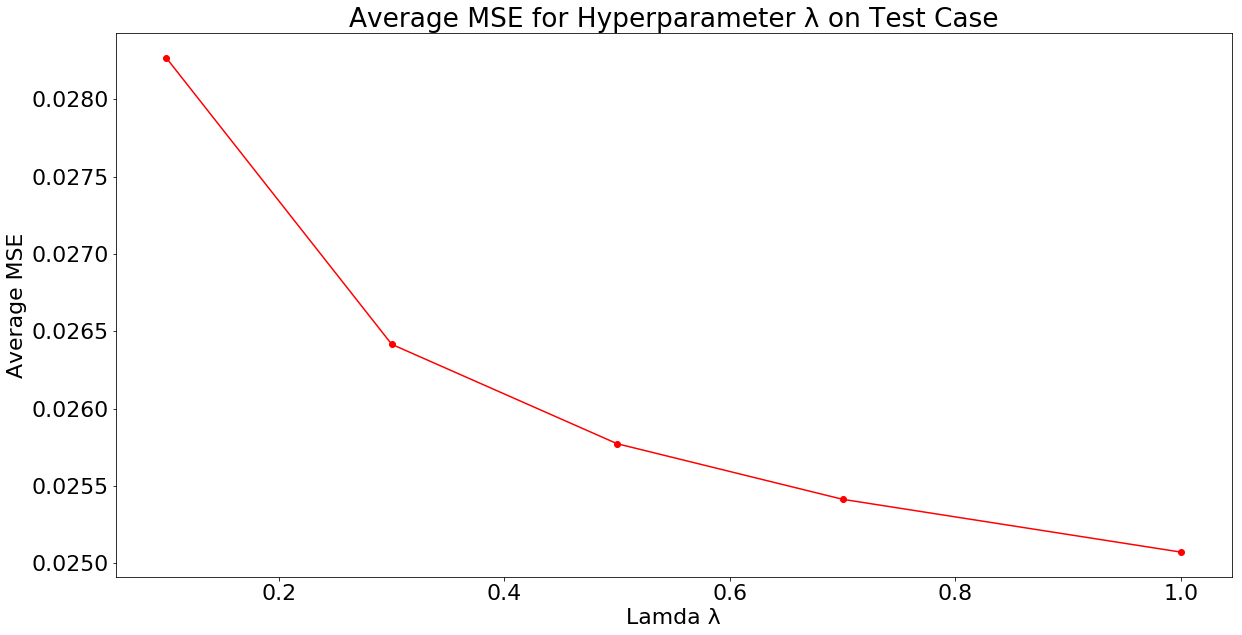

In [337]:
# trying different lambda values(ridge regression)
lambdas=[0.1,0.3,0.5,0.7,1.0]

Average_MSE=[]

# for each lamda we are testing average mse for test cases given weights we learned from training data
for j in lambdas:
    MSEs=[]
    for i in range(5):
        MSEs.append(MSE(yValues(testingSet[i],len(xValues(testingSet[i])[0])-1),predictionValue(dataWeights(i,j),xValues(testingSet[i]))))
    Average_MSE.append(np.mean(MSEs))
    
plt.plot(lambdas,Average_MSE,"-ro")
plt.ylabel('Average MSE')
plt.xlabel('Lamda λ')
plt.title("Average MSE for Hyperparameter λ on Test Case")


In [318]:
#we will find the parameters learned over the 5 splits of trainign set for a certain lambda, and average them for each lambda

lambdas=[0.1,0.3,0.5,0.7,1.0]
lamda_weights=[]

for j in lambdas:
    weight_list=[]
    for i in range(5):
        weight_list.append(dataWeights(i,j))
    added=[sum(x) for x in zip(*weight_list)]
    for i in added:
        i=i/5
    lamda_weights.append(added)

for j in range (len(lamda_weights)):
    print("For lamda value λ",lambdas[j]," the average weights are:" )
    for i in range (len(lamda_weights[0])):
        print(lamda_weights[j][i])
    print(" ")

    

For lamda value λ 0.1  the average weights are:
[[0.64932421]]
[[-0.32723451]]
[[-0.13307824]]
[[1.1372039]]
[[-0.18712473]]
[[-0.1657274]]
[[0.32441727]]
[[0.41985173]]
[[-0.81871176]]
[[0.11313092]]
[[0.52246785]]
[[-0.65442778]]
[[0.17176925]]
[[-0.07337678]]
[[0.00796822]]
[[0.12648617]]
[[-0.53292056]]
[[0.73964364]]
[[0.21029956]]
[[-0.45306078]]
[[0.66091657]]
[[-0.22831341]]
[[-0.91822922]]
[[-0.06716806]]
[[-0.11231226]]
[[-0.05362003]]
[[0.13327536]]
[[0.05423409]]
[[0.08255541]]
[[-0.77021665]]
[[-0.54051792]]
[[0.54029837]]
[[0.19116677]]
[[-0.05638716]]
[[0.75068864]]
[[-0.38155512]]
[[-0.17852612]]
[[0.10251737]]
[[0.5809656]]
[[0.73716494]]
[[0.13660472]]
[[-0.31088046]]
[[-0.03001765]]
[[0.20095529]]
[[-0.314406]]
[[-0.72895686]]
[[-0.1971095]]
[[-0.08528953]]
[[0.18441994]]
[[-0.63855735]]
[[0.4170002]]
[[0.59133922]]
[[-0.50660462]]
[[0.06004123]]
[[-0.00034376]]
[[0.07573528]]
[[-0.07250151]]
[[-0.52959767]]
[[0.43659125]]
[[0.06455116]]
[[0.36903582]]
[[0.05169619]]

In [363]:
# let's try the regression with a reduced set of features and see if we are abe to have the same results for prediction function

#we are modifying our xvalue function to be able to reduce the size 
def xValues_modified(data_matrix,reduction_size):
    x=[]
    for i in range (len(data_matrix)):
        list=[]
        list.append(1)
        for j in range (len(data_matrix[0])-1-reduction_size):
            list.append(data_matrix[i][j])
        x.append(list)
    return x

#modifiying weight value
def dataWeights_modified(i,lmb,reduction_size):
    xmatrix = np.matrix(xValues_modified(trainingSet[i],reduction_size))
    ymatrix = np.transpose(np.matrix(yValues(trainingSet[i], len(xValues_modified(trainingSet[i],reduction_size)[i]) - 1)))
    imatrix = identityMatrix(len(xValues_modified(trainingSet[i],reduction_size)[i]))
    w=weightMatrix(lmßb, xmatrix, ymatrix, imatrix )
    return w

#reduce features by 100, 123 thus haveing 23 x features ass opposed to 123
lmb=1.0
reduction=100


MSEs=[]


for i in range(5):
    reduced_feature_weights=predictionValue(dataWeights_modified(i,lmb,reduction),xValues_modified(trainingSet[i],reduction))
    y_value=yValues(trainingSet[i],len(xValues_modified(trainingSet[i],reduction)[0])-1)
    mse=MSE(y_value,reduced_feature_weights)
    MSEs.append(mse)
    
print("Average Mean Squared Error with set reduced by",reduction,":",np.mean(MSEs))

Average Mean Squared Error with set reduced by 100 : 0.015273165683279896
